In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw

The network is a directed graph of papers (nodes) and citations (edges). Here, we are interpreting it as an undirected graph.

In [3]:
edges_pp = pd.read_csv("edges_pp.csv")
all_papers = list(set(edges_pp.src.values.tolist()+edges_pp.dst.values.tolist()))

In [25]:
citation_network = nx.Graph()

In [26]:
for paper in all_papers:
    if paper==paper:
        citation_network.add_node(paper)

In [27]:
for i in range(len(edges_pp)):
    citation_network.add_edges_from(
        [(edges_pp.src[i], edges_pp.dst[i])])

In [28]:
print("Edges: ", len(list(citation_network.edges(data=True))))
print("Nodes: ", len(list(citation_network.nodes(data=True))))

Edges:  731296
Nodes:  107375


In [36]:
degree_sequence = sorted([d for n, d in citation_network.degree()], reverse=True)

In [38]:
fit = powerlaw.Fit(degree_sequence)

Calculating best minimal value for power law fit
C:\Users\lmccabe\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [75]:
fit.power_law.alpha

3.035755004442288

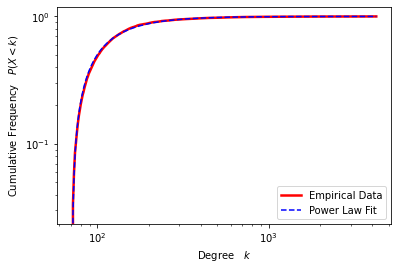

In [85]:
fig = fit.plot_cdf(color='r', linewidth=2.5, label="Empirical Data")
fit.power_law.plot_cdf(color='b', linestyle='--', ax=fig, label="Power Law Fit")
plt.xlabel("Degree   $k$")
plt.ylabel("Cumulative Frequency   $P(X < k)$")
plt.legend()
plt.show()

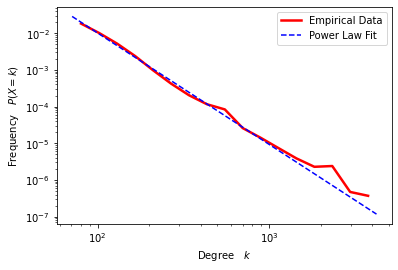

In [84]:
fig = fit.plot_pdf(color='r', linewidth=2.5, label="Empirical Data")
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig, label="Power Law Fit")
plt.xlabel("Degree   $k$")
plt.ylabel("Frequency   $P(X = k)$")
plt.legend()
plt.show()

### The Structure of the Undirected COVID-19 Citation Network

Cite:
1. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777
2. https://pypi.org/project/powerlaw/
3. https://www.nature.com/articles/s41467-019-08746-5


We compare the maximum likelihood power law fit (alpha = 3.04) to that of lognormal, exponential, and Weibull distributions, reporting the loglikelihood ratios and relevant p-values between the power law and alternative distributions in Table X. We find moderate evidence supporting a power law degree distribution to the undirected version of the citation network (Figure X), though we cannot reject a lognormal fit at the 0.05 significance level. We note that this observation is consistent with Broido and Clauset's observations that "social networks are at best weakly scale free" and "for most networks, log-normal distributions fit the data as well or better than power laws" [3].

In [71]:
fit.find_xmin()

C:\Users\lmccabe\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


71.0

In [62]:
R, p = fit.distribution_compare(
    'power_law',
    'lognormal',
    normalized_ratio=True)
print (R, p)

0.6462147700295194 0.5181402754405203


In [56]:
R, p = fit.distribution_compare(
    'power_law',
    'exponential',
    normalized_ratio=True)
print (R, p)

7.146374816328668 8.909956750595811e-13


In [58]:
# stretched exponential = Weibull
R, p = fit.distribution_compare(
    'power_law',
    'stretched_exponential',
    normalized_ratio=True)
print (R, p)

2.839880971427003 0.004513036994677826
